# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [216]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [217]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv("SAMPLE.env")

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [218]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3



#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [219]:
# The monthly amount for the member's household income
monthly_income = 12000


#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [220]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [221]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(btc_response, indent=4, sort_keys=True))


{
    "data": {
        "1": {
            "circulating_supply": 19373631,
            "id": 1,
            "last_updated": 1684111790,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 519644712594,
                    "percent_change_1h": -0.469321910543915,
                    "percent_change_24h": 0.159631755341559,
                    "percent_change_7d": -6.40072172632028,
                    "percentage_change_1h": -0.469321910543915,
                    "percentage_change_24h": 0.159631755341559,
                    "percentage_change_7d": -6.40072172632028,
                    "price": 26780.0,
                    "volume_24h": 8739918249
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 19373631,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurren

In [222]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(eth_response, indent=4, sort_keys=True))


{
    "data": {
        "1027": {
            "circulating_supply": 122951966,
            "id": 1027,
            "last_updated": 1684111792,
            "max_supply": 122951966,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 220541361213,
                    "percent_change_1h": -0.496972140612539,
                    "percent_change_24h": -0.432741401241536,
                    "percent_change_7d": -5.54502822590024,
                    "percentage_change_1h": -0.496972140612539,
                    "percentage_change_24h": -0.432741401241536,
                    "percentage_change_7d": -5.54502822590024,
                    "price": 1790.14,
                    "volume_24h": 5319116765
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 122951966,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [223]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response["data"]["1"]["quotes"]["USD"]["price"]

# Print the current price of BTC
print(btc_price)


26780.0


In [224]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response["data"]["1027"]["quotes"]["USD"]["price"]

# Print the current price of ETH
print(eth_price)


1790.14


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [225]:
# Compute the current value of the BTC holding 
btc_value = btc_price * btc_coins

# Print current value of your holding in BTC
print(f"Value of BTC Holdings: ${btc_value:.2f}")


Value of BTC Holdings: $32136.00


In [226]:
# Compute the current value of the ETH holding 
eth_value = eth_price * eth_coins

# Print current value of your holding in ETH
print(f"Value of ETH Holdings: ${eth_value:.2f}")


Value of ETH Holdings: $9487.74


In [227]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
print(f"Total Value of Crypto Holdings: ${total_crypto_wallet:.2f}")


Total Value of Crypto Holdings: $41623.74


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [228]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [229]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("alpaca_api_key")
alpaca_secret_key = os.getenv("alpaca_secret_key")


# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")


#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [230]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ["SPY", "AGG"]

# Set timeframe to 1Day
timeframe = "1D"

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
start_date = pd.Timestamp("2023-05-12", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-05-12", tz="America/New_York").isoformat()



#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [231]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df


# Reorganize the DataFrame
# Separate ticker data
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_portfolio = pd.concat([SPY,AGG],axis=1, keys=['SPY','AGG'])

# Review the first 5 rows of the Alpaca DataFrame
df_portfolio.head()


SPY                                    \
                             open    high     low   close    volume   
timestamp                                                             
2023-05-12 04:00:00+00:00  413.42  413.64  409.07  411.59  68745125   

                                                     AGG                       \
                          trade_count        vwap   open   high    low  close   
timestamp                                                                       
2023-05-12 04:00:00+00:00      485465  411.173936  99.89  99.95  99.39  99.39   

                                                           
                            volume trade_count       vwap  
timestamp                                                  
2023-05-12 04:00:00+00:00  3979446       19676  99.550071

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [232]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = float(df_portfolio["AGG"]["close"])

# Print the AGG closing price
print(agg_close_price)


99.39


In [233]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print the SPY closing price
print(spy_close_price)


411.59


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [234]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_close_price * agg_shares

# Print the current value of the bond portfolio
print(f"Total value of the bond portfolio: ${agg_value:.2f}")


Total value of the bond portfolio: $19878.00


In [235]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_close_price * spy_shares

# Print the current value of the stock portfolio
print(f"Total value of the stock portfolio: ${spy_value:.2f}")


Total value of the stock portfolio: $45274.90


In [236]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value + spy_value

# Print the current balance of the stock and bond portion of the portfolio
print(f"Total value of the stock and bond portfolio: ${total_stocks_bonds:.2f}")


Total value of the stock and bond portfolio: $65152.90


In [237]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_crypto_wallet + total_stocks_bonds

# Print current cryptocurrency wallet balance
print(f"Total value of the stocks, bond and crypto portfolio: ${total_portfolio:.2f}")


Total value of the stocks, bond and crypto portfolio: $106776.64


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [238]:
# Consolidate financial assets data into a Python list
savings_data = [total_crypto_wallet,total_stocks_bonds]

# Review the Python list savings_data
print(savings_data)
    

[41623.742, 65152.899999999994]


#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [239]:
# Create a Pandas DataFrame called savings_df 
savings_df = pd.DataFrame(
    savings_data, columns=["Amount"],
    index=["crypto", "stock/bonds"]
)

# Display the savings_df DataFrame
print(savings_df)


                Amount
crypto       41623.742
stock/bonds  65152.900


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':'Total Value of the Portfolio'}, ylabel='Amount'>

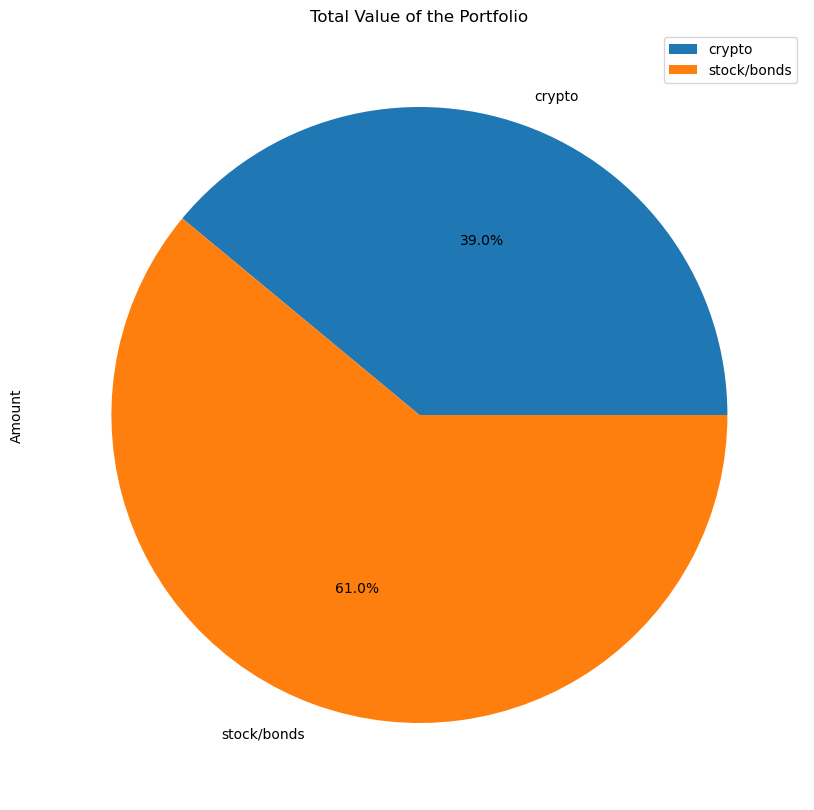

In [261]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
savings_df.plot.pie(title="Total Value of the Portfolio", y="Amount", figsize= (10,10), autopct='%1.1f%%')



#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [241]:
# Create a variable named emergency_fund_value
emergency_fund_value = monthly_income * 3


##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [242]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
if total_portfolio > emergency_fund_value:
    print("Congradulations, you have enough money for emergency funds")
elif total_portfolio == emergency_fund_value:
    print("Congradulations, you have achieve the great milestone of having 3x monthly savings for emergency funds")
else:
    print(f"You are ${emergency_fund_value - total_portfolio:.2f} away from achieving the milestone of having 3x monthly savings for emergency funds")



Congradulations, you have enough money for emergency funds


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [243]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
start_date_3y = pd.Timestamp("2020-05-12", tz="America/New_York").isoformat()
end_date_3y = pd.Timestamp("2023-05-12", tz="America/New_York").isoformat()

In [244]:
# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
df_portfolio_3y = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date_3y,
    end = end_date_3y
).df

# Reorganize the DataFrame
# Separate ticker data
SPY = df_portfolio_3y[df_portfolio_3y['symbol']=='SPY'].drop('symbol', axis=1)
AGG = df_portfolio_3y[df_portfolio_3y['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_portfolio_3y = pd.concat([SPY,AGG],axis=1, keys=['SPY','AGG'])

# Display both the first and last five rows of the DataFrame
display(df_portfolio_3y.head())
display(df_portfolio_3y.tail())


SPY                                      \
                             open    high      low   close     volume   
timestamp                                                               
2020-05-12 04:00:00+00:00  293.79  294.24  286.520  286.55   95999786   
2020-05-13 04:00:00+00:00  286.06  287.19  278.965  281.49  144809899   
2020-05-14 04:00:00+00:00  278.95  285.11  272.990  285.04  121978055   
2020-05-15 04:00:00+00:00  282.37  286.33  281.340  286.29  111232676   
2020-05-18 04:00:00+00:00  293.05  296.75  292.700  294.94  120320234   

                                                      AGG                   \
                          trade_count        vwap    open     high     low   
timestamp                                                                    
2020-05-12 04:00:00+00:00      473668  290.175286  116.46  116.595  116.23   
2020-05-13 04:00:00+00:00      833463  282.592780  116.63  116.760  116.45   
2020-05-14 04:00:00+00:00      751985  281.007718  116.91  116.970  116.72   
2020-05-15 04:00:00+00:00      541431  284.426420  117.02  117.090  116.90   
2020-05-18 04:00:00+00:00      574739  293.868055  116.97  117.090  116.66   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2020-05-12 04:00:00+00:00  116.41  6161470       21099  116.418538  
2020-05-13 04:00:00+00:00  116.60  4425927       16375  116.647726  
2020-05-14 04:00:00+00:00  116.96  5698908       20153  116.866224  
2020-05-15 04:00:00+00:00  117.03  5897983       19220  116.995900  
2020-05-18 04:00:00+00:00  116.86  5038337       19722  116.822101

SPY                                       \
                             open     high       low   close    volume   
timestamp                                                                
2023-05-08 04:00:00+00:00  412.97  413.240  411.2800  412.74  50053705   
2023-05-09 04:00:00+00:00  411.13  412.090  410.6894  410.93  49241788   
2023-05-10 04:00:00+00:00  413.88  414.535  408.8700  412.85  96156049   
2023-05-11 04:00:00+00:00  411.95  412.430  409.9700  412.13  70157064   
2023-05-12 04:00:00+00:00  413.42  413.640  409.0700  411.59  68745125   

                                                      AGG                   \
                          trade_count        vwap    open    high      low   
timestamp                                                                    
2023-05-08 04:00:00+00:00      423103  412.511882   99.21   99.35  99.0801   
2023-05-09 04:00:00+00:00      386390  411.356128   99.11   99.19  99.0100   
2023-05-10 04:00:00+00:00      691870  411.964838   99.43   99.68  99.3900   
2023-05-11 04:00:00+00:00      530526  411.526341  100.11  100.19  99.8800   
2023-05-12 04:00:00+00:00      485465  411.173936   99.89   99.95  99.3900   

                                                                  
                           close   volume trade_count       vwap  
timestamp                                                         
2023-05-08 04:00:00+00:00  99.10  5481594       20167  99.199785  
2023-05-09 04:00:00+00:00  99.01  5712210       22222  99.077911  
2023-05-10 04:00:00+00:00  99.65  4803044       18737  99.571949  
2023-05-11 04:00:00+00:00  99.95  7703942       28737  99.974344  
2023-05-12 04:00:00+00:00  99.39  3979446       19676  99.550071

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [245]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
# YOUR CODE HERE

MC_portfolio_30y = MCSimulation(
    portfolio_data = df_portfolio_3y,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

# Printing the first five rows of the simulation input data
MC_portfolio_30y.portfolio_data.head()



SPY                                      \
                             open    high      low   close     volume   
timestamp                                                               
2020-05-12 04:00:00+00:00  293.79  294.24  286.520  286.55   95999786   
2020-05-13 04:00:00+00:00  286.06  287.19  278.965  281.49  144809899   
2020-05-14 04:00:00+00:00  278.95  285.11  272.990  285.04  121978055   
2020-05-15 04:00:00+00:00  282.37  286.33  281.340  286.29  111232676   
2020-05-18 04:00:00+00:00  293.05  296.75  292.700  294.94  120320234   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2020-05-12 04:00:00+00:00      473668  290.175286          NaN  116.46   
2020-05-13 04:00:00+00:00      833463  282.592780    -0.017658  116.63   
2020-05-14 04:00:00+00:00      751985  281.007718     0.012611  116.91   
2020-05-15 04:00:00+00:00      541431  284.426420     0.004385  117.02   
2020-05-18 04:00:00+00:00      574739  293.868055     0.030214  116.97   

                                                                         \
                              high     low   close   volume trade_count   
timestamp                                                                 
2020-05-12 04:00:00+00:00  116.595  116.23  116.41  6161470       21099   
2020-05-13 04:00:00+00:00  116.760  116.45  116.60  4425927       16375   
2020-05-14 04:00:00+00:00  116.970  116.72  116.96  5698908       20153   
2020-05-15 04:00:00+00:00  117.090  116.90  117.03  5897983       19220   
2020-05-18 04:00:00+00:00  117.090  116.66  116.86  5038337       19722   

                                                    
                                 vwap daily_return  
timestamp                                           
2020-05-12 04:00:00+00:00  116.418538          NaN  
2020-05-13 04:00:00+00:00  116.647726     0.001632  
2020-05-14 04:00:00+00:00  116.866224     0.003087  
2020-05-15 04:00:00+00:00  116.995900     0.000598  
2020-05-18 04:00:00+00:00  116.822101    -0.001453

In [246]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
MC_portfolio_30y.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/mgair/Documents/Columbia Bootcamp/Code/Module_5_Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992253,0.987325,0.998725,1.006362,1.004150,1.007431,1.007297,1.015500,1.005066,1.008632,...,0.989478,1.005109,0.999748,1.004956,1.008813,0.995584,0.997241,0.993082,0.988905,1.006384
2,0.990422,0.991490,0.992750,1.009383,0.994836,1.003198,1.006232,1.002184,1.000932,1.011059,...,0.990654,0.999260,1.000819,0.995426,1.003020,0.997630,1.002687,1.003347,0.994379,1.015338
3,0.989845,0.998421,0.974723,1.012738,0.996159,1.005882,1.012191,0.994791,1.003267,1.002029,...,0.982600,0.995747,1.006306,0.974595,0.993858,0.991568,0.997716,1.018476,0.991533,1.020903
4,0.983718,1.001191,0.965976,1.001605,0.994082,1.000010,1.015830,0.994948,0.994525,0.997128,...,0.984333,1.001298,1.005736,0.979263,0.983899,0.989747,0.994664,1.007760,0.991834,1.016591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,7.930152,4.102378,4.628941,3.110603,10.761391,8.607434,2.392657,3.114728,8.870935,1.908917,...,2.019534,15.675134,2.577977,3.845809,7.576378,4.438021,10.278635,4.756799,4.850059,11.150258
7557,7.961368,4.088290,4.643388,3.115214,10.805397,8.531557,2.384507,3.108863,8.886171,1.928753,...,2.021836,15.494778,2.579740,3.860869,7.535152,4.497734,10.253311,4.797041,4.884242,11.098819
7558,7.957260,4.095967,4.639338,3.148656,10.737538,8.553245,2.370661,3.075950,8.926113,1.932819,...,2.022655,15.436168,2.596614,3.809514,7.533335,4.483973,10.339274,4.825953,4.848798,11.215163
7559,8.001582,4.123025,4.638092,3.142519,10.675848,8.505179,2.361935,3.065693,8.892085,1.926327,...,2.019124,15.316843,2.600645,3.814609,7.491842,4.538535,10.221547,4.804811,4.859792,11.200547


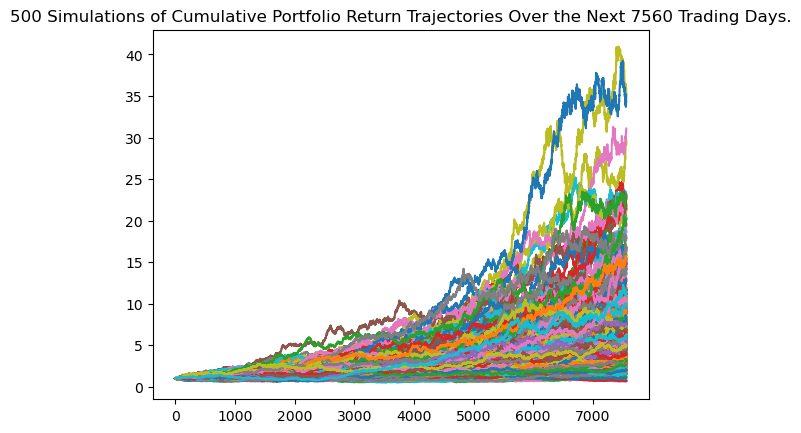

In [247]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
MC_portfolio_30y_line_plot = MC_portfolio_30y.plot_simulation()

# Saving the graph
MC_portfolio_30y_line_plot.get_figure().savefig("30_Year_Simulation.png", bbox_inches="tight")


#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

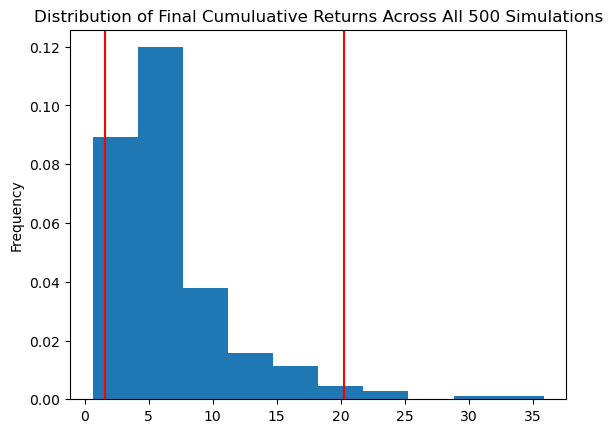

In [248]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram

MC_portfolio_30y_histogram = MC_portfolio_30y.plot_distribution()

# Saving the graph
MC_portfolio_30y_histogram.get_figure().savefig("30_Year_Distribution.png", bbox_inches="tight")


#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [249]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable

MC_portfolio_30y_summary = MC_portfolio_30y.summarize_cumulative_return()


# Review the 30-year Monte Carlo summary statistics
print(MC_portfolio_30y_summary)

count           500.000000
mean              6.736405
std               4.855626
min               0.632228
25%               3.490054
50%               5.589647
75%               8.005446
max              35.854127
95% CI Lower      1.547558
95% CI Upper     20.220811
Name: 7560, dtype: float64


### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [250]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"Current balance of stock and bond portion: ${total_stocks_bonds:.2f}")


Current balance of stock and bond portion: $65152.90


In [251]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = MC_portfolio_30y_summary[8] * total_stocks_bonds
ci_upper_thirty_cumulative_return = MC_portfolio_30y_summary[9] * total_stocks_bonds

# Print the result of your calculations

print(f"There is a 95% chance that current portfolio balance of ${total_stocks_bonds:.2f}"
      f" with a 60% weight in SPY over the next 30 years will end within in the range of"
      f" ${ci_lower_thirty_cumulative_return:.2f} and ${ci_upper_thirty_cumulative_return:.2f}.")


There is a 95% chance that current portfolio balance of $65152.90 with a 60% weight in SPY over the next 30 years will end within in the range of $100827.90 and $1317444.49.


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [252]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
MC_portfolio_10y = MCSimulation(
    portfolio_data = df_portfolio_3y,
    weights = [.80,.20],
    num_simulation = 500,
    num_trading_days = 252*10
)

# Review the simulation input data
MC_portfolio_10y.portfolio_data.head()


SPY                                      \
                             open    high      low   close     volume   
timestamp                                                               
2020-05-12 04:00:00+00:00  293.79  294.24  286.520  286.55   95999786   
2020-05-13 04:00:00+00:00  286.06  287.19  278.965  281.49  144809899   
2020-05-14 04:00:00+00:00  278.95  285.11  272.990  285.04  121978055   
2020-05-15 04:00:00+00:00  282.37  286.33  281.340  286.29  111232676   
2020-05-18 04:00:00+00:00  293.05  296.75  292.700  294.94  120320234   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2020-05-12 04:00:00+00:00      473668  290.175286          NaN  116.46   
2020-05-13 04:00:00+00:00      833463  282.592780    -0.017658  116.63   
2020-05-14 04:00:00+00:00      751985  281.007718     0.012611  116.91   
2020-05-15 04:00:00+00:00      541431  284.426420     0.004385  117.02   
2020-05-18 04:00:00+00:00      574739  293.868055     0.030214  116.97   

                                                                         \
                              high     low   close   volume trade_count   
timestamp                                                                 
2020-05-12 04:00:00+00:00  116.595  116.23  116.41  6161470       21099   
2020-05-13 04:00:00+00:00  116.760  116.45  116.60  4425927       16375   
2020-05-14 04:00:00+00:00  116.970  116.72  116.96  5698908       20153   
2020-05-15 04:00:00+00:00  117.090  116.90  117.03  5897983       19220   
2020-05-18 04:00:00+00:00  117.090  116.66  116.86  5038337       19722   

                                                    
                                 vwap daily_return  
timestamp                                           
2020-05-12 04:00:00+00:00  116.418538          NaN  
2020-05-13 04:00:00+00:00  116.647726     0.001632  
2020-05-14 04:00:00+00:00  116.866224     0.003087  
2020-05-15 04:00:00+00:00  116.995900     0.000598  
2020-05-18 04:00:00+00:00  116.822101    -0.001453

In [253]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC_portfolio_10y.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/mgair/Documents/Columbia Bootcamp/Code/Module_5_Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.980948,1.014189,1.010088,0.998626,0.989519,0.990274,0.998983,1.004340,1.006850,0.994257,...,0.994111,0.999964,0.997598,0.981922,1.000561,0.987897,1.008131,0.986200,1.005529,0.980398
2,0.987862,1.017719,1.034109,1.007286,0.988251,0.987107,1.015594,0.992005,1.002859,0.979124,...,0.985932,1.008639,1.007833,0.981720,0.999327,1.009502,1.008580,0.984571,1.010788,0.977825
3,0.965240,1.010934,1.025916,1.000701,1.017511,0.986179,1.007633,1.008277,0.998820,0.980669,...,0.984421,1.006358,1.015351,0.969685,1.013612,1.009637,1.010908,0.981497,1.006657,0.968956
4,0.957630,1.009564,1.045777,0.990188,0.995708,0.976511,1.004239,1.014697,0.997801,0.979861,...,0.991297,1.005784,1.020722,0.950342,1.038027,1.021796,1.018885,0.979293,1.008883,0.961152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.941468,3.656573,1.958421,2.617862,3.617774,1.783750,2.086430,5.354162,1.570215,1.410020,...,3.368497,2.159460,3.645235,3.325006,1.203317,2.871422,4.755644,2.129188,3.406537,2.182628
2517,1.937057,3.632811,1.949929,2.651257,3.636726,1.783987,2.101522,5.328165,1.572514,1.410033,...,3.372645,2.141757,3.644078,3.370664,1.216698,2.869168,4.679517,2.159686,3.385898,2.149157
2518,1.917351,3.665629,1.951136,2.651048,3.623945,1.795947,2.089144,5.346106,1.576378,1.411679,...,3.405950,2.179048,3.707410,3.433731,1.202788,2.867017,4.650223,2.155692,3.331899,2.137997
2519,1.901333,3.713045,1.944145,2.706285,3.651751,1.792320,2.079213,5.321894,1.580567,1.440740,...,3.382498,2.151545,3.718579,3.423071,1.205793,2.874860,4.605595,2.175906,3.344004,2.115633


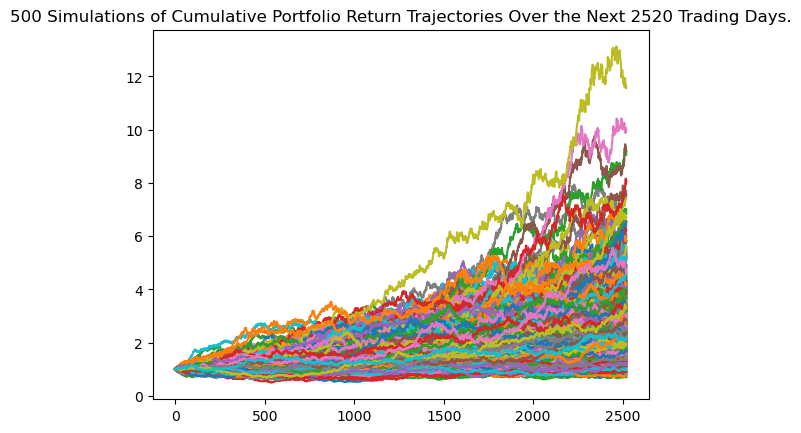

In [254]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
MC_portfolio_10y_line_plot = MC_portfolio_10y.plot_simulation()

# Saving the graph
MC_portfolio_10y_line_plot.get_figure().savefig("10_Year_Simulation.png", bbox_inches="tight")


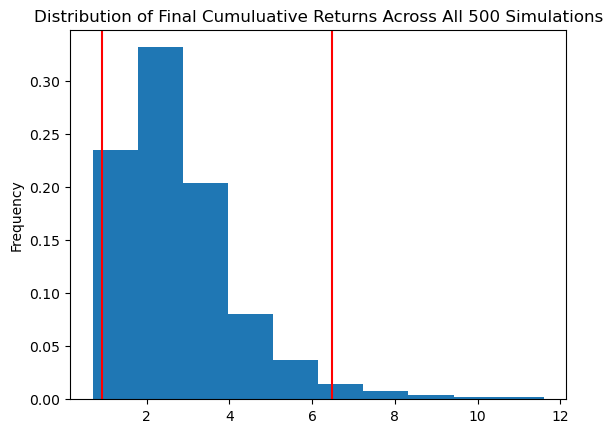

In [255]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
MC_portfolio_10y_histogram = MC_portfolio_10y.plot_distribution()

# Saving the graph
MC_portfolio_10y_histogram.get_figure().savefig("10_Year_Distribution.png", bbox_inches="tight")


In [256]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
MC_portfolio_10y_summary = MC_portfolio_10y.summarize_cumulative_return()


# Review the 10-year Monte Carlo summary statistics
print(MC_portfolio_10y_summary)

count           500.000000
mean              2.802137
std               1.448926
min               0.694661
25%               1.760234
50%               2.541110
75%               3.455770
max              11.599685
95% CI Lower      0.921059
95% CI Upper      6.470032
Name: 2520, dtype: float64


### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [257]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"Current balance of stock and bond portion: ${total_stocks_bonds:.2f}")


Current balance of stock and bond portion: $65152.90


In [258]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = MC_portfolio_10y_summary[8] * total_stocks_bonds
ci_upper_ten_cumulative_return = MC_portfolio_10y_summary[9] * total_stocks_bonds

# Print the result of your calculations
print(f"There is a 95% chance that current portfolio balance of ${total_stocks_bonds:.2f}"
      f" with a 80% weight in SPY over the next 10 years will end within in the range of"
      f" ${ci_lower_ten_cumulative_return:.2f} and ${ci_upper_ten_cumulative_return:.2f}.")


There is a 95% chance that current portfolio balance of $65152.90 with a 80% weight in SPY over the next 10 years will end within in the range of $60009.66 and $421541.32.


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?